In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import io


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [23]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-heberman.csv'
df = pd.read_csv(url)

In [24]:
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


We will use patient age, number of lymph nodes and year of surgery as features and status as target variables. In the dataset, patients who survived more than 5 years are assigned status 1 and those who died before 5 years are assigned status 2, in which case we map 1:1 and 2:0.

In [25]:
features=['age','operation_year','axil_nodes']
x=df[features]
df['status']=df['status'].map({1:1, 2:0})
y=df.status

In [26]:
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [28]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
 
predictions = logreg.predict(x_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[-0.01558675  0.03293527 -0.07053309]]
Intercept: [0.00057878]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.18      0.30        17
           1       0.81      1.00      0.90        60

    accuracy                           0.82        77
   macro avg       0.91      0.59      0.60        77
weighted avg       0.85      0.82      0.76        77

Confusion Matrix:
 [[ 3 14]
 [ 0 60]]
Accuracy Score: 0.8181818181818182
Precision: 0.8108108108108109
Recall: 1.0


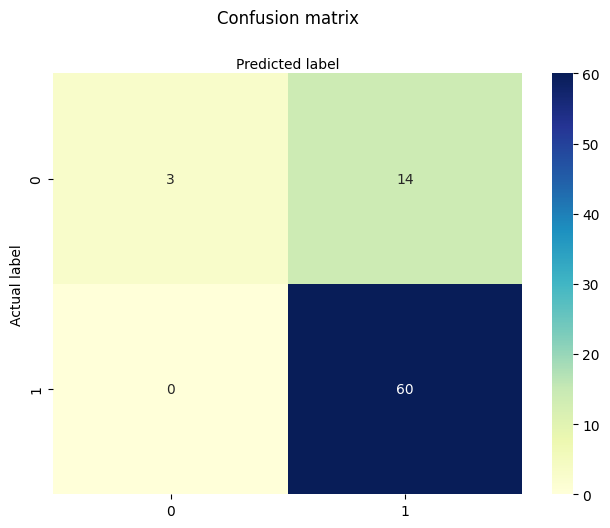

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Another method for evaluating how well different classification models perform is the ROC-AUC curve. ROC stands for Receiver Operating Curve and AUC stands for Area Under Curve. The blue line shown in the image below is the ROC, and the area below this ROC is the AUC. The higher the ROC value i.e. the closer the blue line moves upwards to (1), the better our model is.

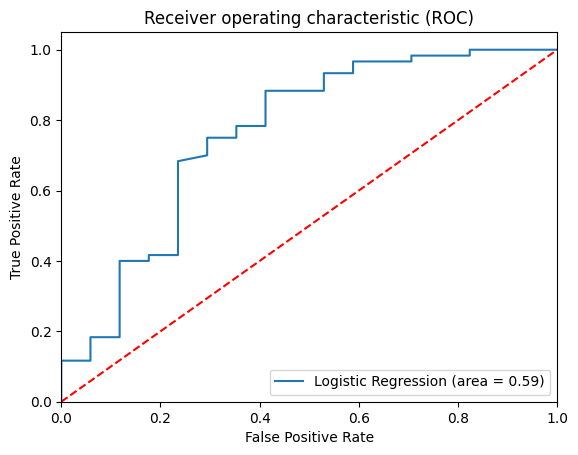

In [30]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Now it's time to predict, suppose a patient is 35 years old, has 15 lymph nodes next to a cancer cell and had surgery in 1964, now your model has to predict whether he lived for 5 years or died before that?

In [34]:
new_observation = [[35,64, 15]]
logreg.predict(new_observation)

C:\Users\SK\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

array([0]) means he lived more than 5 years. If we calculate the probability values ​​for the two classes, we find that the probability of this patient surviving more than 5 years is 62.36% and the probability of dying before 5 years is 37.63%.

In [35]:
logreg.predict_proba(new_observation)

C:\Users\SK\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.37638906, 0.62361094]])